
##Problem statement

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps







In [10]:
##import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
glass=pd.read_csv("glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
##copy into different variable
glass_df=glass.copy()
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
#descriptive statistics
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
#information about dataset
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


From above,
 There is no missing and null values present in dataset.
Types of all columns is float64 expect target column.
            
    

In [8]:
glass_df.shape

(214, 10)

There are 214 rows and 10 columns in data

<AxesSubplot:xlabel='Type', ylabel='count'>

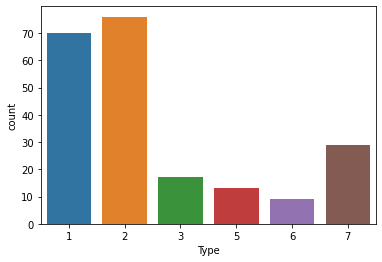

In [11]:
#plot countplot to summarize the glass types
sns.countplot(glass_df['Type'],label='Count')

# Countplot Show the counts of observations of glass classification in each categorical bin using bars.

In [12]:
#check unique Type of glass in dataset
glass_df.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [14]:
#use .nunique to calculate count of unique numbers.
glass_df.Type.nunique()

6

There Are 6 Types of glasses.

In [15]:
#Check duplicate rows in dataset
glass_df[glass_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


We found one duplicate row, we will drop it.

In [16]:
#Drop duplicate rows from dataset
glass_df=glass_df.drop(39)
print(glass_df.shape)

(213, 10)


# Correlation Analysis & Visualization

In [17]:
#checkin correlation 
glass_df.corr()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


From above ,

            Correlation between feature to feature is less than and equal to 0.5 so its good for model prediction by OLS assumptions.
            Target and feature correlation is high so it is good for model prediction.

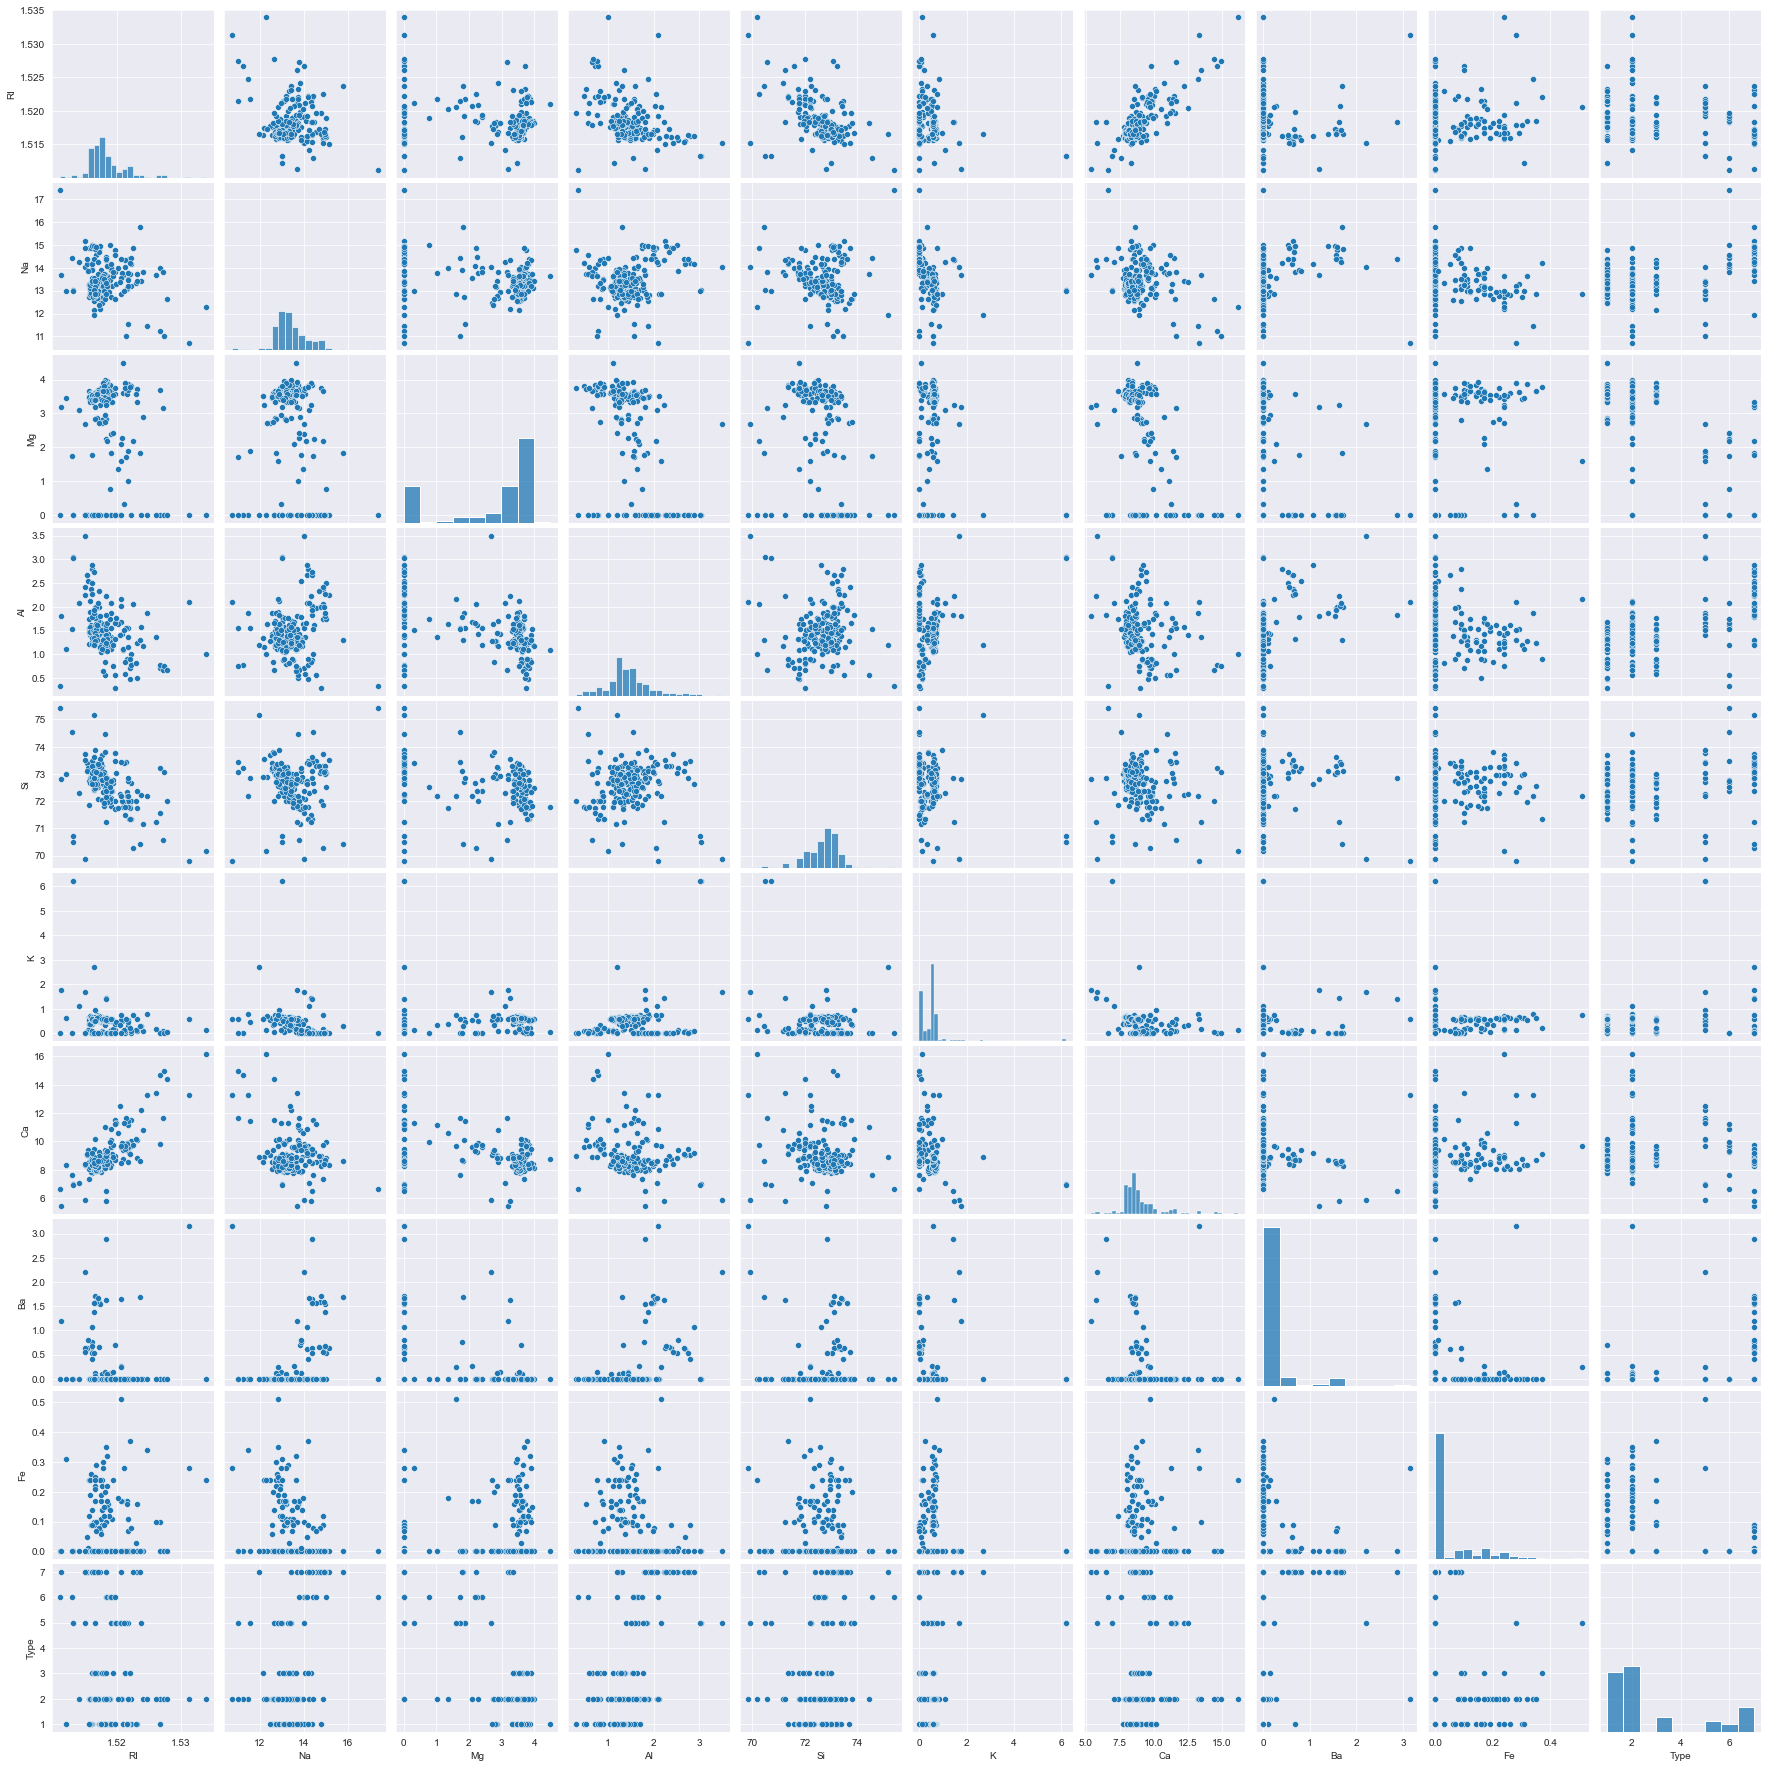

In [18]:
#Plot pairwise relationships in a dataset.
sns.set_style(style='darkgrid')
sns.pairplot(glass_df)

<AxesSubplot:>

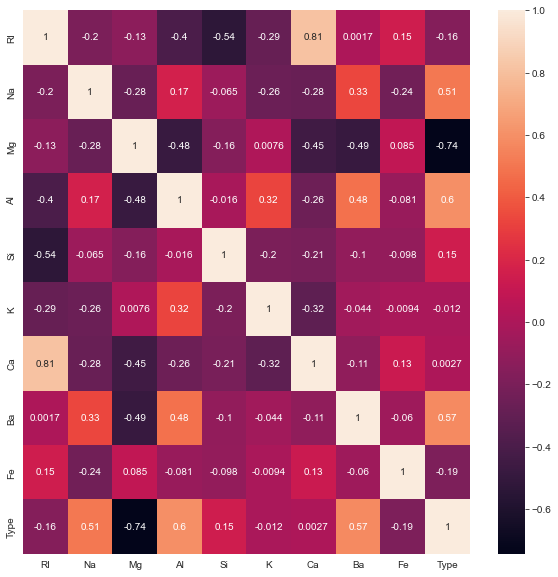

In [20]:
#plotting heatmap
plt.figure(figsize=(10,10))
sns.heatmap(glass_df.corr(),annot=True)

Between Calsium(Ca) and Refractive Index(RI) have Highest correlation,i.e 0.81

RI          AxesSubplot(0.125,0.71587;0.133621x0.16413)
Na       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Mg        AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Al       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Si       AxesSubplot(0.766379,0.71587;0.133621x0.16413)
K          AxesSubplot(0.125,0.518913;0.133621x0.16413)
Ca      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Ba       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Fe      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Type    AxesSubplot(0.766379,0.518913;0.133621x0.16413)
dtype: object

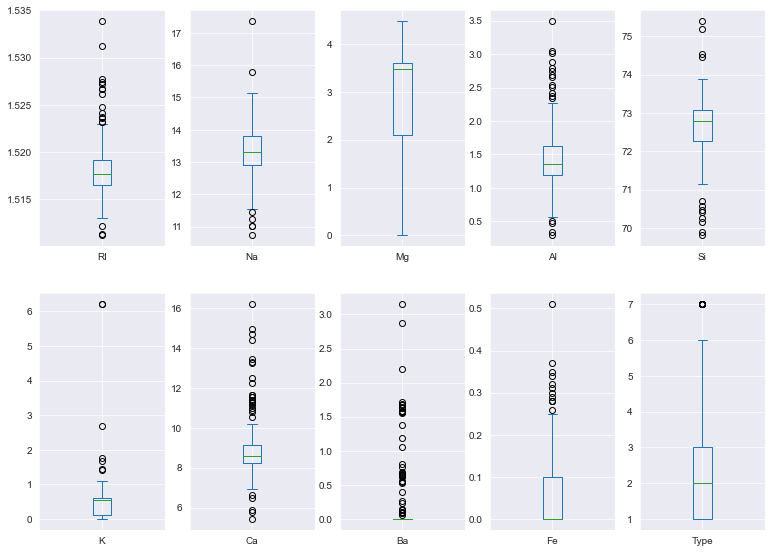

In [21]:
#plotting boxplot
glass_df.plot(kind="box",subplots=True,layout=(4,5),figsize=(13,20),sharex=False, sharey=False)

From above box plot,So many outliers present in our columns.

In [22]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [24]:
#splitting dataset and store in variable
x=glass_df.iloc[:,:9]
y=glass_df.iloc[:,9]

In [25]:
##using Cross validation techniques
num_fold=20
kfold=KFold(n_splits=num_fold)

From cross validation technique we use Kfold validation and number of splits is 20

In [26]:
##calling model
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x,y)

KNeighborsClassifier()

In [27]:
#score
result=cross_val_score(model,x,y,cv=kfold)
result

array([0.36363636, 0.63636364, 0.90909091, 0.90909091, 0.36363636,
       0.72727273, 1.        , 0.81818182, 0.18181818, 0.45454545,
       0.81818182, 0.36363636, 0.63636364, 0.        , 0.        ,
       0.        , 0.1       , 0.3       , 0.9       , 1.        ])

In [28]:
#result mean score
result.mean()

0.5240909090909092

In [29]:
#Using hyperparameter tunning
param_dist={
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,18,20]
}

In [30]:
#calling model grid searchcv
grid=GridSearchCV(
    model,param_grid=param_dist)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 15, 16, 18, 20]})

In [31]:
##best paraameters
grid.best_params_

{'n_neighbors': 1}

In [32]:
#best score after hyper parameter tunning
grid.best_score_

0.64828349944629

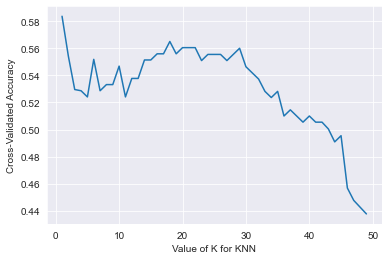

In [33]:
##plotting KNN score graph
k_scores=[]
for i in range(1,50):
    model=KNeighborsClassifier(n_neighbors=i)
    result=cross_val_score(model,x,y,cv=kfold)
    k_scores.append((pd.DataFrame(result)).mean())
    
plt.plot(range(1,50), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [34]:
#creating dataframe
glass_accuracy = pd.DataFrame({'Value of k' : range(1,50),
                            'Accuracy' : k_scores})
glass_accuracy

,Value of k,Accuracy
0,1,0 0.583636 dtype: float64
1,2,0 0.554091 dtype: float64
2,3,0 0.529545 dtype: float64
3,4,0 0.528636 dtype: float64
4,5,0 0.524091 dtype: float64
5,6,0 0.551818 dtype: float64
6,7,0 0.528636 dtype: float64
7,8,0 0.533182 dtype: float64
8,9,0 0.533182 dtype: float64
9,10,0 0.546818 dtype: float64


# Conclusion

1. Model score before Tunning is 52% that is not good for model prediciton.So we will use hyperparameter tunning.

 2.After grid search cv we get roundup 65% Score that is better than pervious score so prediciton will be great.